Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 0.2786 - val_loss: 0.1931
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1719 - val_loss: 0.1522
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1428 - val_loss: 0.1321
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1273 - val_loss: 0.1201
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1170 - val_loss: 0.1115
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1096 - val_loss: 0.1054
Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1045 - val_loss: 0.1014
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1010 - val_loss: 0.0983
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0986 - val_loss: 0.0963
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0970 - val_loss: 0.0950

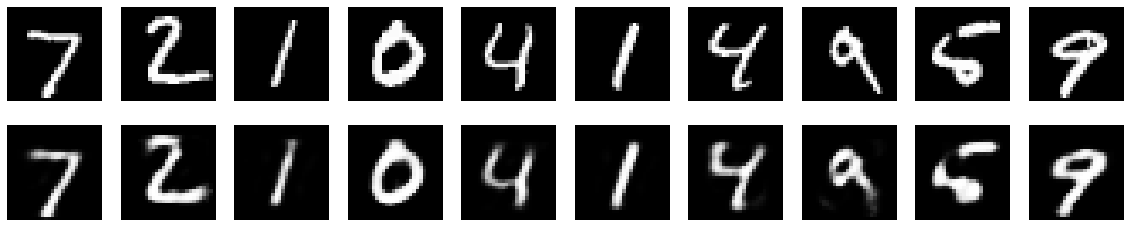

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Set the latent dimension (change to 16 or 64 to test)
latent_dim = 32

# Load MNIST dataset and normalize
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Define the autoencoder model
# Encoder
input_img = Input(shape=(784,))
encoded = Dense(latent_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict on test data
reconstructed = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


Epoch 1/20
235/235 [==============================] - 3s 8ms/step - loss: 0.2735 - val_loss: 0.2081
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1919 - val_loss: 0.1775
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1699 - val_loss: 0.1605
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1555 - val_loss: 0.1485
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1458 - val_loss: 0.1410
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1399 - val_loss: 0.1365
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1359 - val_loss: 0.1329
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1329 - val_loss: 0.1304
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1308 - val_loss: 0.1288
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1293 - val_loss: 0.1275

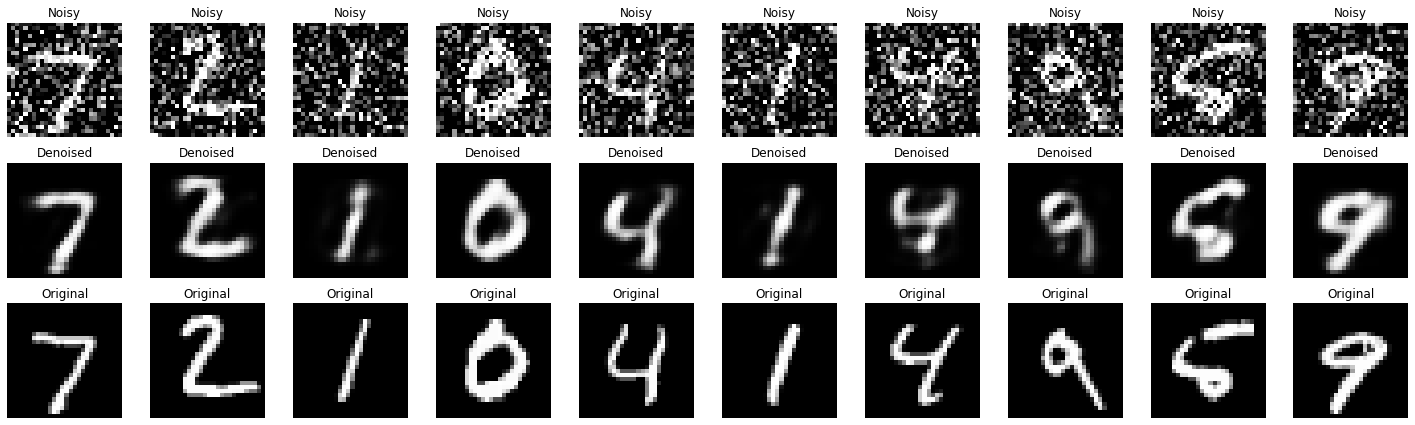

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Set latent dimension
latent_dim = 32

# Load and preprocess MNIST data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder
input_img = Input(shape=(784,))
encoded = Dense(latent_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the autoencoder with noisy inputs and clean targets
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict on test data
reconstructed = autoencoder.predict(x_test_noisy)

# Visualize noisy vs. denoised outputs
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Original clean image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import random
import sys
import os

# Load text data
path = tf.keras.utils.get_file('little_prince.txt', 
    origin='https://www.gutenberg.org/cache/epub/1457/pg1457.txt')
with open(path, 'r', encoding='utf-8') as f:
    text = f.read().lower()

print(f"Corpus length: {len(text)}")

# Character-level tokenization
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}
vocab_size = len(chars)

print(f"Vocabulary size: {vocab_size}")

# Prepare sequences for training
seq_length = 40
step = 3
sentences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

print(f"Number of sequences: {len(sentences)}")

# Vectorization (One-hot encoding)
x = np.zeros((len(sentences), seq_length, vocab_size), dtype=np.bool_)
y = np.zeros((len(sentences), vocab_size), dtype=np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the model
model = Sequential([
    LSTM(128, input_shape=(seq_length, vocab_size)),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(x, y, batch_size=128, epochs=10)

# Sampling helper function
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Generate text
def generate_text(length=400, temperature=1.0, seed=None):
    if not seed:
        start_index = random.randint(0, len(text) - seq_length - 1)
        seed = text[start_index: start_index + seq_length]
    generated = seed
    print(f"Seed: \"{seed}\"\n---")

    for i in range(length):
        sampled = np.zeros((1, seq_length, vocab_size))
        for t, char in enumerate(seed):
            sampled[0, t, char_to_idx.get(char, 0)] = 1

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = idx_to_char[next_index]

        generated += next_char
        seed = generated[-seq_length:]

    print(generated)

# Generate samples with different temperatures
print("\n--- Temperature: 0.2 ---")
generate_text(400, temperature=0.2)

print("\n--- Temperature: 0.5 ---")
generate_text(400, temperature=0.5)

print("\n--- Temperature: 1.0 ---")
generate_text(400, temperature=1.0)

542508/542508 [==============================] - 1s 3us/step
Corpus length: 521430
Vocabulary size: 63
Number of sequences: 173797
Epoch 1/10
1358/1358 [==============================] - 129s 93ms/step - loss: 2.5444
Epoch 2/10
1358/1358 [==============================] - 139s 102ms/step - loss: 2.1727
Epoch 3/10
1358/1358 [==============================] - 161s 119ms/step - loss: 2.0502
Epoch 4/10
1358/1358 [==============================] - 153s 113ms/step - loss: 1.9702
Epoch 5/10
1358/1358 [==============================] - 164s 121ms/step - loss: 1.9093
Epoch 6/10
1358/1358 [==============================] - 157s 115ms/step - loss: 1.8590
Epoch 7/10
1358/1358 [==============================] - 166s 122ms/step - loss: 1.8158
Epoch 8/10
1358/1358 [==============================] - 144s 106ms/step - loss: 1.7763
Epoch 9/10
1358/1358 [==============================] - 132s 97ms/step - loss: 1.7427
Epoch 10/10
1358/1358 [==============================] - 154s 113ms/step - loss: 1.7120


17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/3
157/157 [==============================] - 80s 483ms/step - loss: 0.4297 - accuracy: 0.7976 - val_loss: 0.3276 - val_accuracy: 0.8622
Epoch 2/3
157/157 [==============================] - 85s 539ms/step - loss: 0.2243 - accuracy: 0.9146 - val_loss: 0.3399 - val_accuracy: 0.8724
Epoch 3/3
782/782 [==============================] - 41s 51ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     12500
           1       0.84      0.88      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



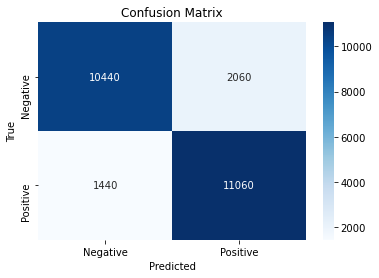

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load IMDB dataset
vocab_size = 10000  # Use top 10,000 words
maxlen = 200        # Max length of each review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build LSTM model
model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

# Evaluate on test set
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

